<a href="https://colab.research.google.com/github/Tar-ive/Bank-Customer-Churn-Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("Churn Modeling.csv")

In [25]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [26]:
print(df.shape)

(10000, 14)


In [27]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [28]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [29]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [30]:
print(df["EstimatedSalary"].value_counts())
print(df["Balance"].unique())

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64
[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]


In [31]:
print(df.corr())

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


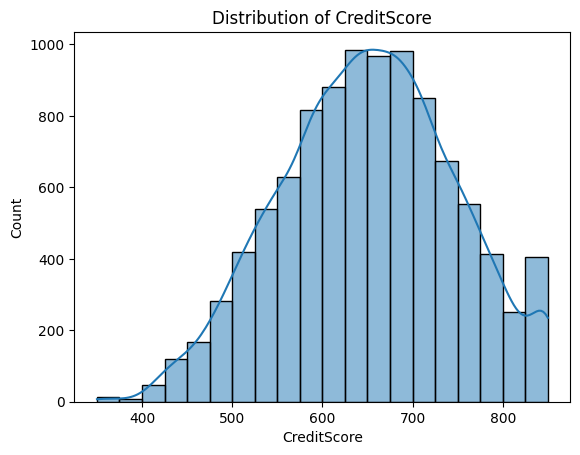

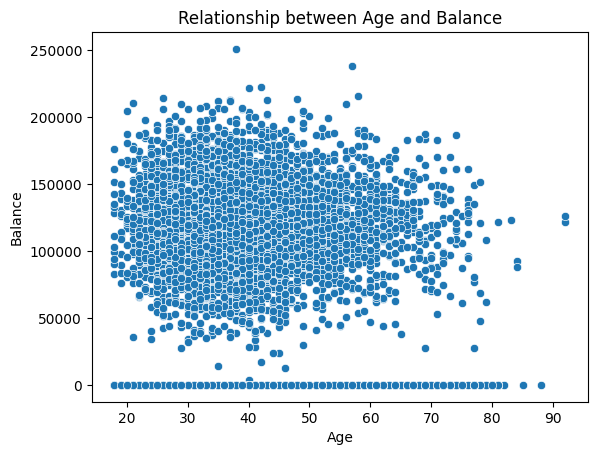

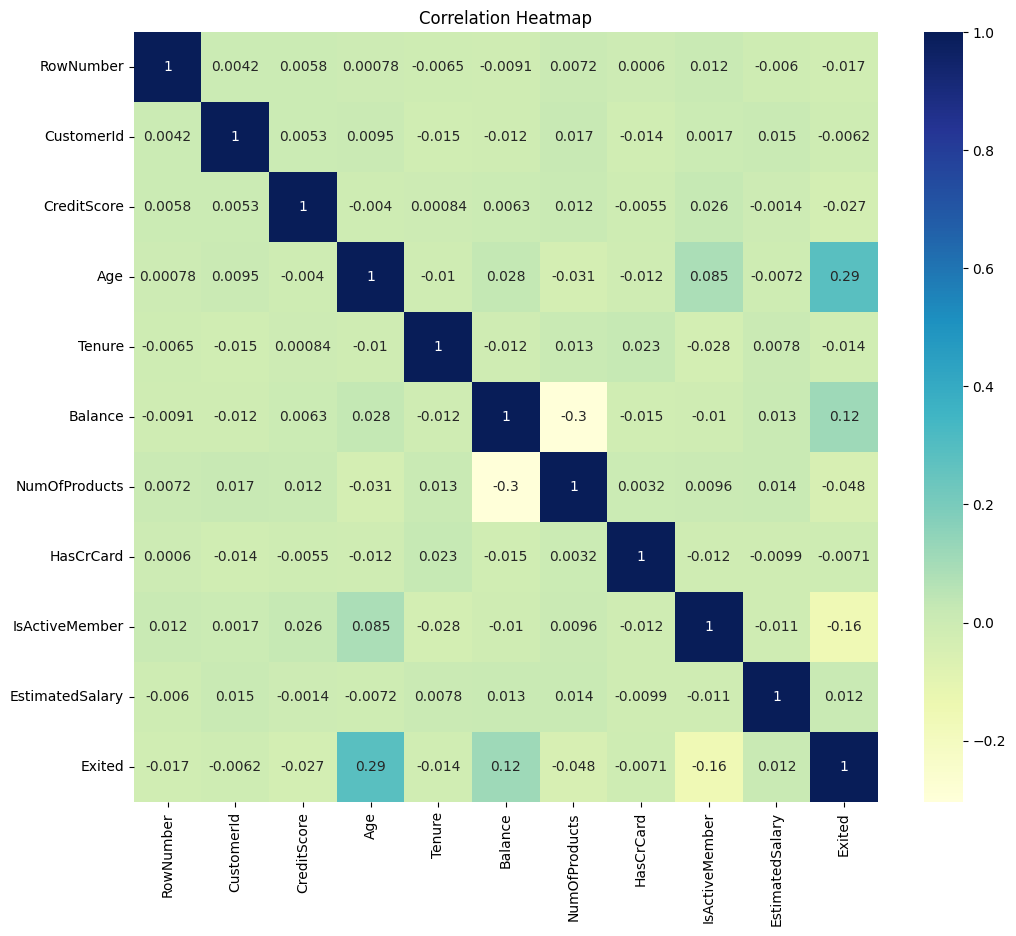

In [33]:
# Visualize the distribution of the CreditScore feature
sns.histplot(df["CreditScore"], bins=20, kde=True)
plt.title("Distribution of CreditScore")
plt.xlabel("CreditScore")
plt.ylabel("Count")
plt.show()

# Visualize the relationship between Age and Balance features
sns.scatterplot(x="Age", y="Balance", data=df)
plt.title("Relationship between Age and Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

# Visualize the correlation between numerical features
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu" , ax=ax)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [38]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [37]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], prefix=["Geo"], drop_first=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler(feature_range=(300, 850))

# fit and transform the credit score column
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])

In [42]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain
0,595.9,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,583.8,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,467.2,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,683.9,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# define the features and target variable
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# create a logistic regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# evaluate the performance of the model on the testing data
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.7995


In [47]:
from sklearn.metrics import classification_report

In [48]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
# Calculate evaluation metrics
# accuracy = score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.07      0.11       393

    accuracy                           0.80      2000
   macro avg       0.62      0.52      0.50      2000
weighted avg       0.74      0.80      0.74      2000



In [49]:
report = classification_report(y_test , y_pred , output_dict=True)

In [56]:
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
f1_0 = report['0']['f1-score']
support_0 = report['0']['support']
precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_1 = report['1']['f1-score']
support_1 = report['1']['support']

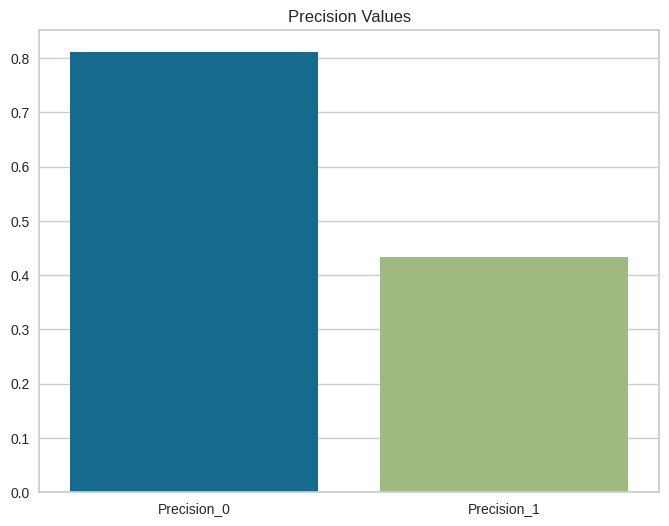

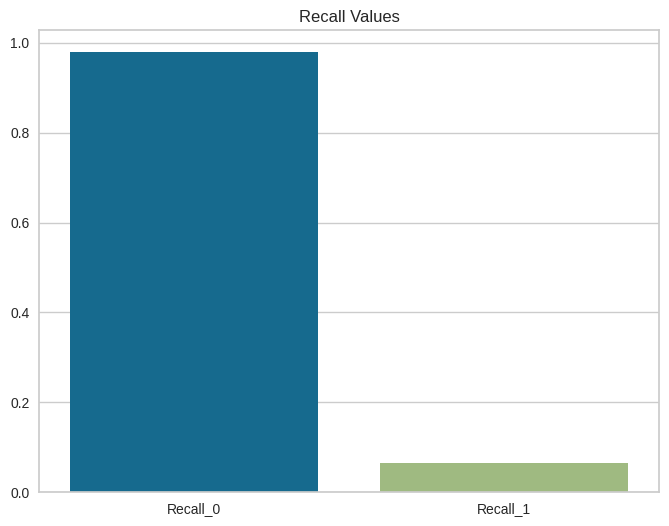

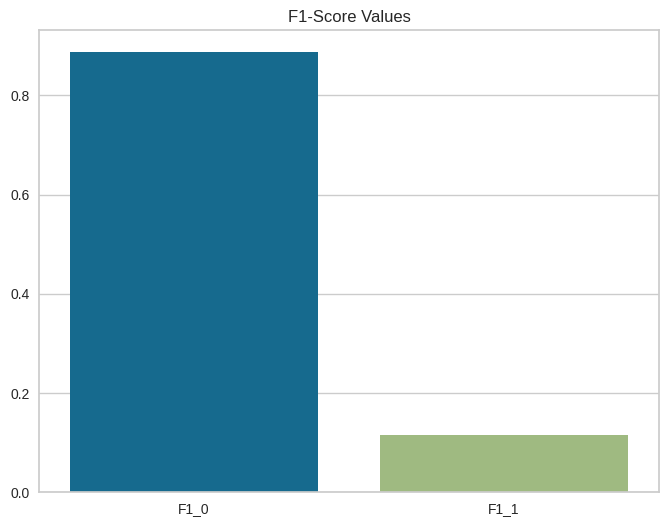

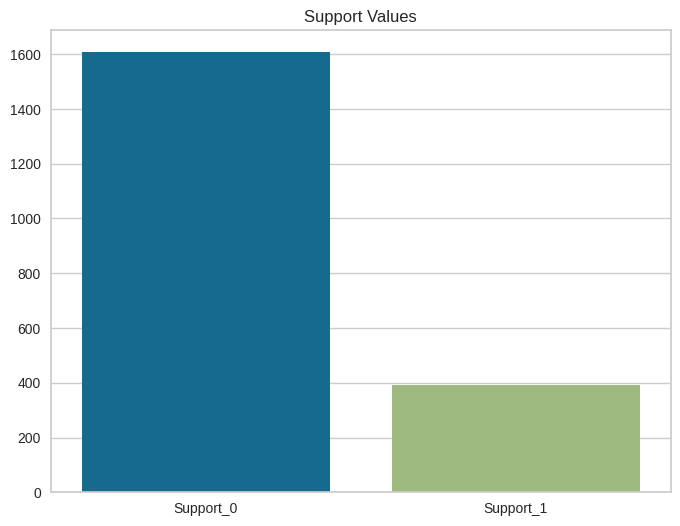

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(x=['Precision_0', 'Precision_1'], y=[precision_0, precision_1])
plt.title('Precision Values')
plt.show()

# plot the recall values
plt.figure(figsize=(8,6))
sns.barplot(x=['Recall_0', 'Recall_1'], y=[recall_0, recall_1])
plt.title('Recall Values')
plt.show()

# plot the f1-score values
plt.figure(figsize=(8,6))
sns.barplot(x=['F1_0', 'F1_1'], y=[f1_0, f1_1])
plt.title('F1-Score Values')
plt.show()

# plot the support values
plt.figure(figsize=(8,6))
sns.barplot(x=['Support_0', 'Support_1'], y=[support_0, support_1])
plt.title('Support Values')
plt.show()

In [58]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numerical columns:', num_cols)

Numerical columns: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [59]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns:', cat_cols)

Categorical columns: []


<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


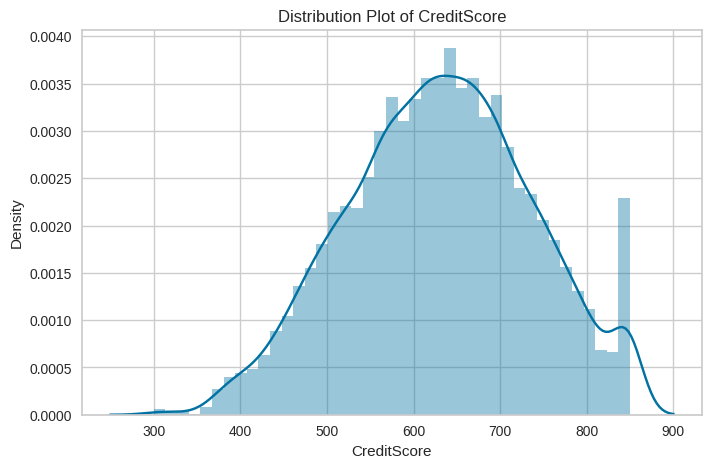

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


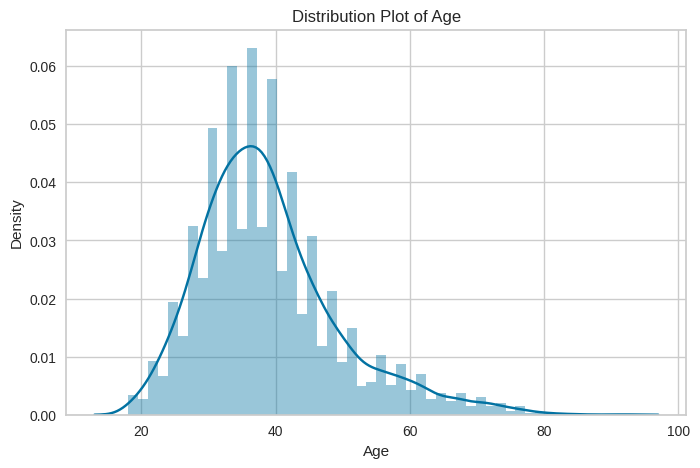

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


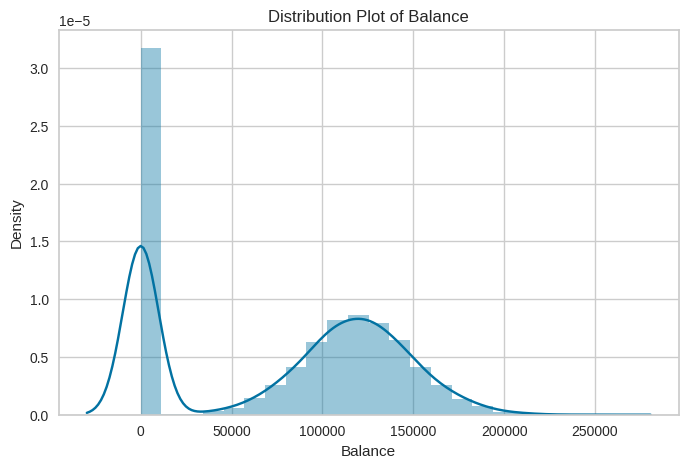

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


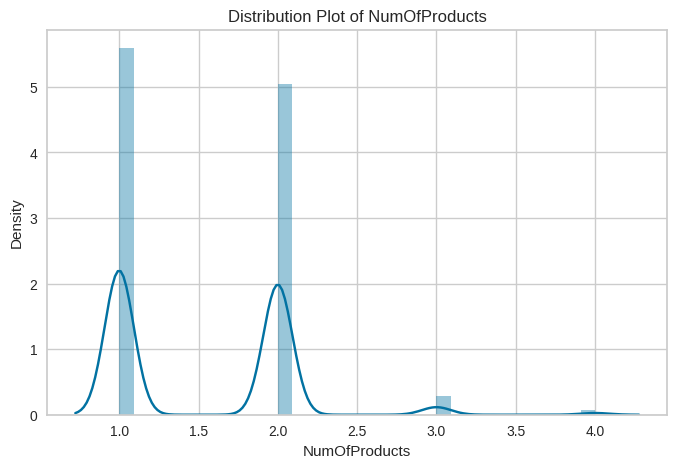

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


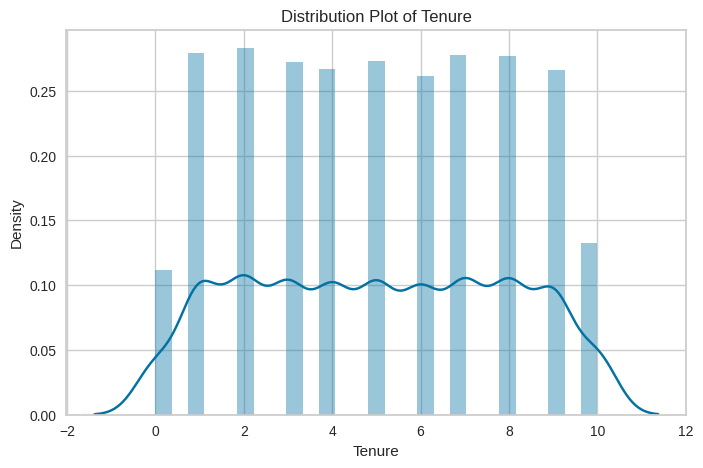

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


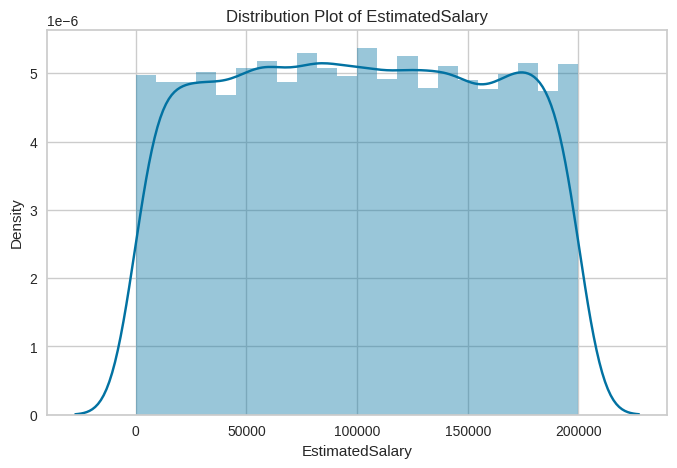

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


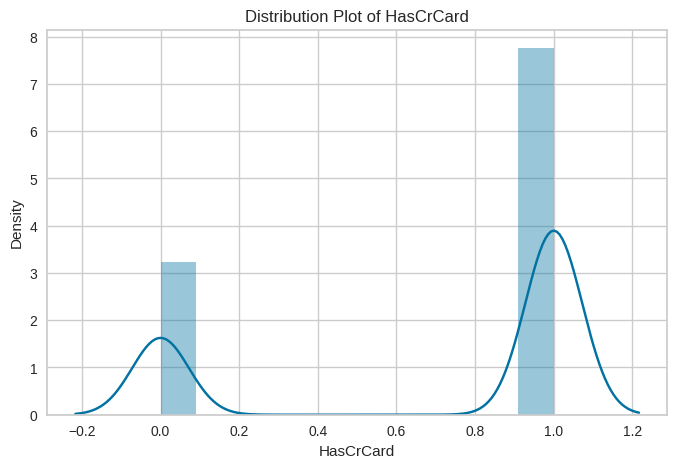

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


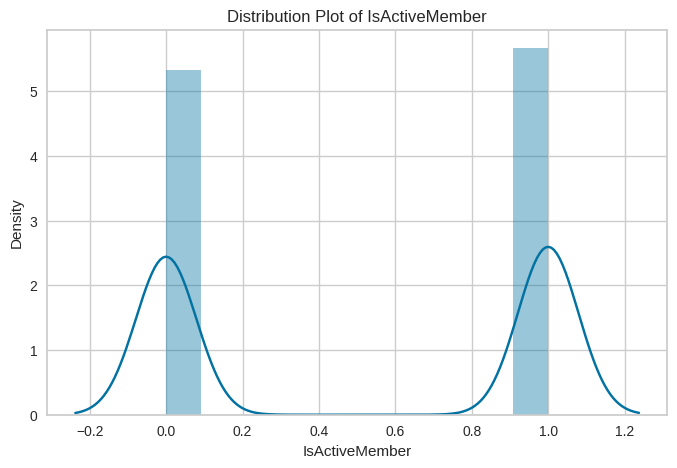

<ipython-input-61-74c2da5478c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


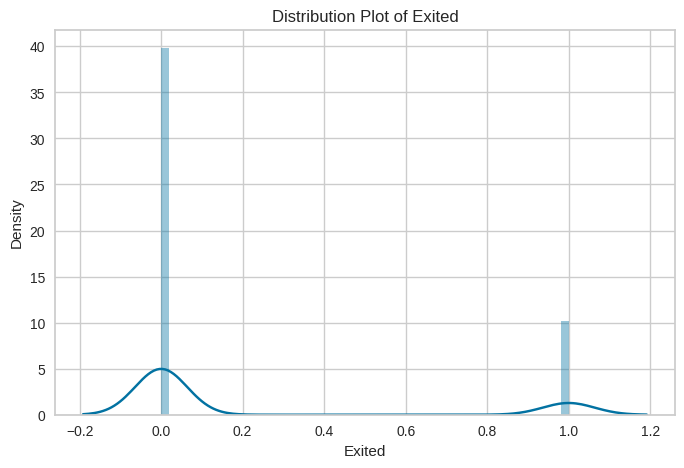

In [61]:
import seaborn as sns

# Select numeric columns
numeric_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Tenure', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'Exited']

# Create subplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.distplot(df[col])
    plt.title(f"Distribution Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

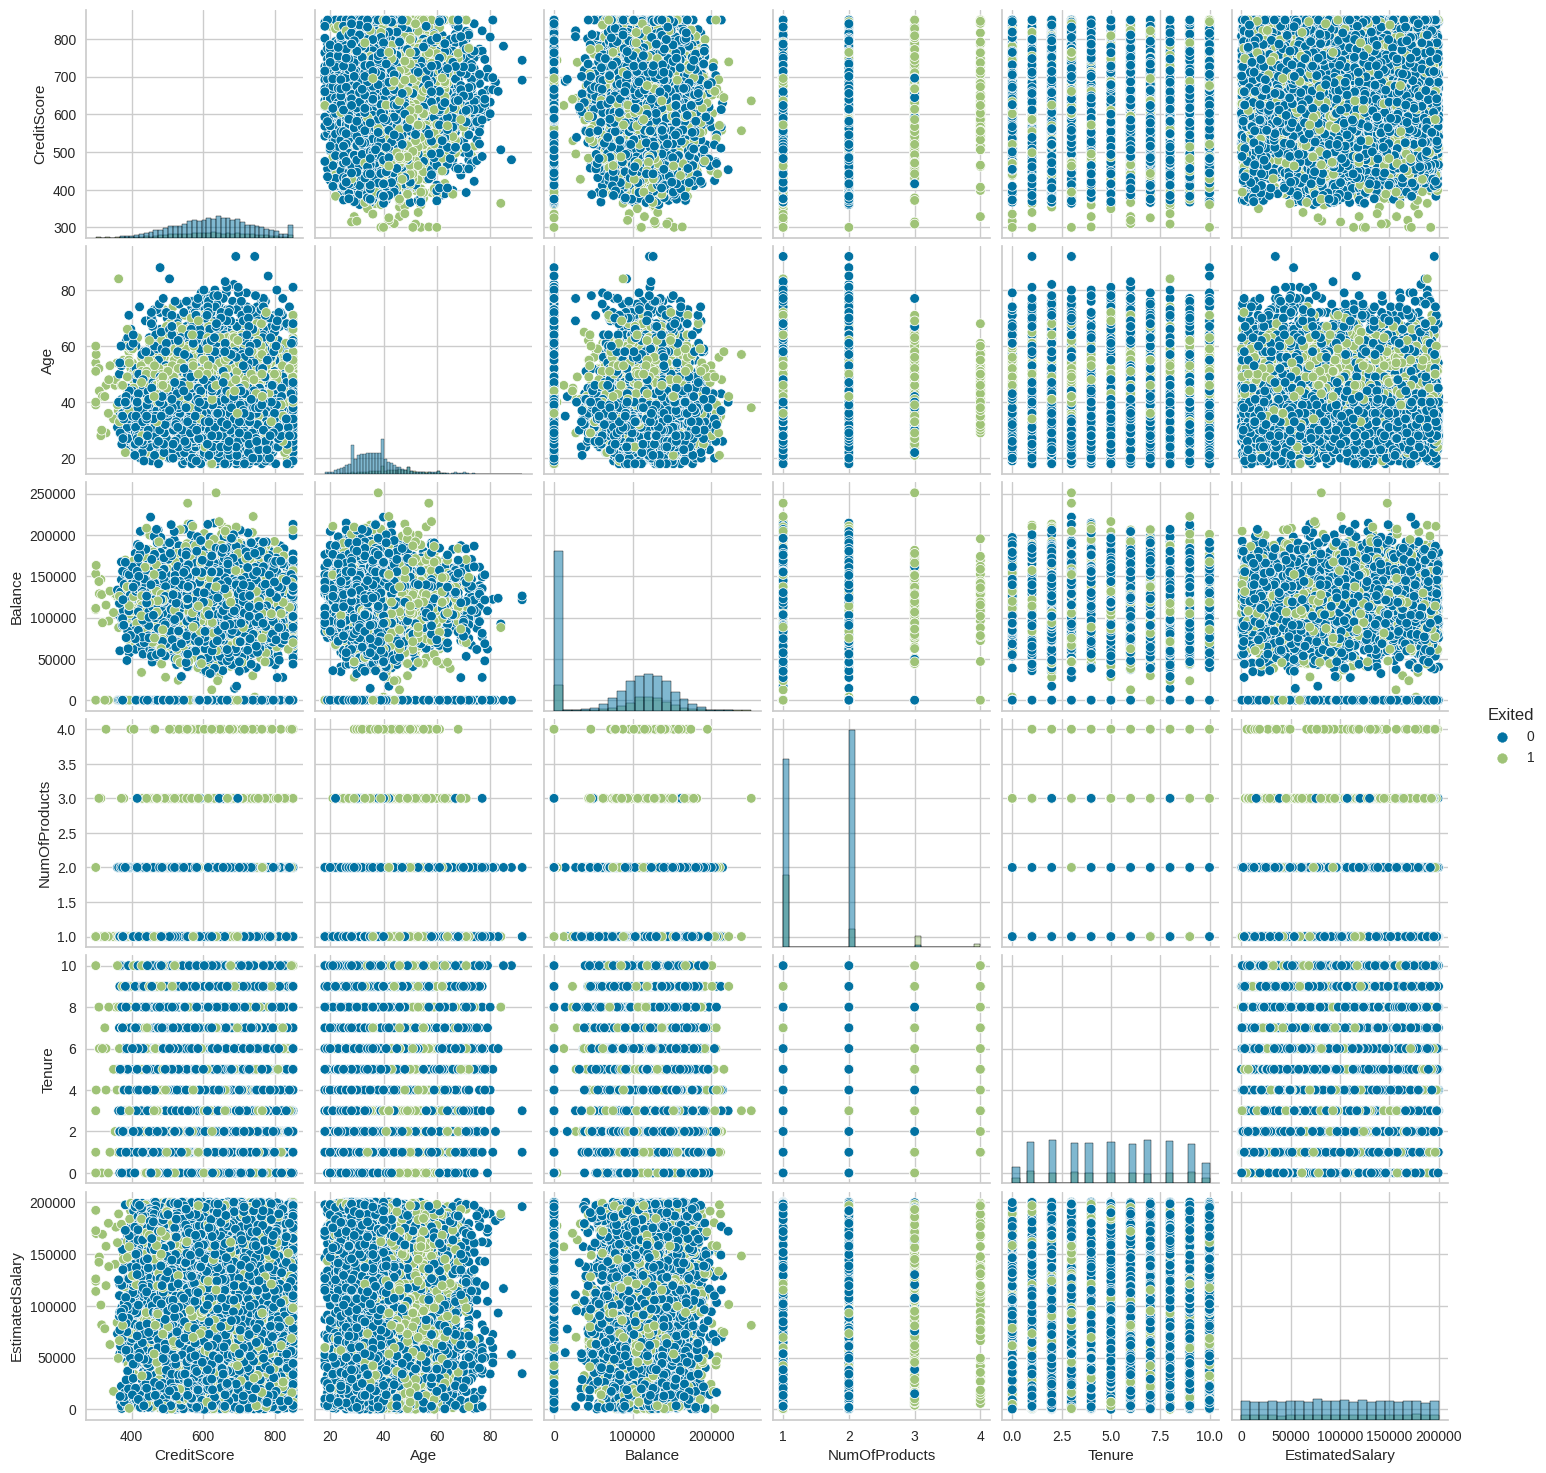

In [63]:
import seaborn as sns

# select the numeric columns
num_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Tenure', 'EstimatedSalary', 'Exited']

# create pairplot with hue as "Exited"
sns.pairplot(df[num_cols], hue='Exited', diag_kind='hist' , height =2.5)



In [64]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain
0,595.9,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,583.8,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,467.2,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,683.9,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [66]:
col_mean = df['CreditScore'].mean()
col_std = df['CreditScore'].std()

# calculate upper and lower bounds
lower_bound = col_mean - 3 * col_std
upper_bound = col_mean + 3 * col_std

# drop rows with values beyond the bounds
df = df[(df['CreditScore'] > lower_bound) & (df['CreditScore'] < upper_bound)]

In [67]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain
0,595.9,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,583.8,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,467.2,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,683.9,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [71]:
import numpy as np
from scipy import stats

In [72]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  9992
After dropping numerical outliers, length of the dataframe is:  9799


<ipython-input-72-d1cb89c51c2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[~constrains], inplace=True)


In [73]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 12 columns.
The reduced dataframe has 12 columns.


In [74]:
reduced_df['Exited'].value_counts()

0    7841
1    1958
Name: Exited, dtype: int64

In [75]:
# select categorical columns
cat_cols = ['Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Geo_Germany', 'Geo_Spain']

# print unique values in each column
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Gender: [0 1]
Unique values in HasCrCard: [1 0]
Unique values in IsActiveMember: [1 0]
Unique values in Exited: [1 0]
Unique values in Geo_Germany: [0 1]
Unique values in Geo_Spain: [0 1]


In [76]:
# calculate percentage of customers who have churned
churn_rate = df['Exited'].mean() * 100

print(f"Percentage of customers who have churned: {churn_rate:.2f}%")

Percentage of customers who have churned: 19.98%


In [80]:
import plotly.express as px 

In [83]:
# group the data by gender and calculate the average balance
avg_bal_by_gender = df.groupby('Gender')['Balance'].mean()

print(f"Average balance by gender:\n{avg_bal_by_gender}")


Average balance by gender:
Gender
0    75622.638861
1    77175.204997
Name: Balance, dtype: float64


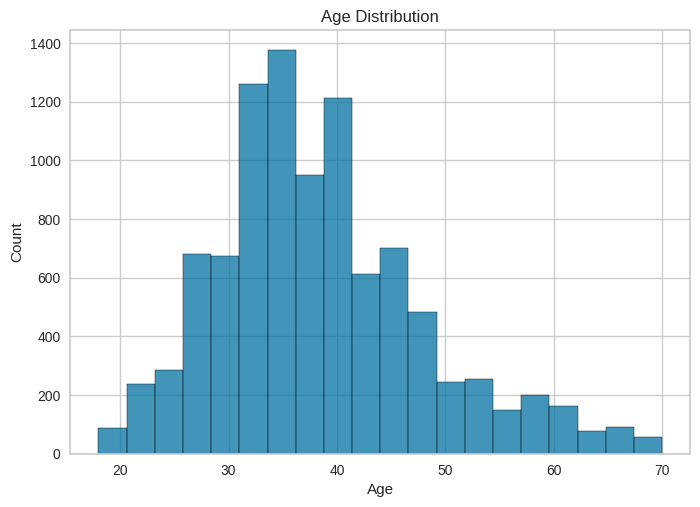

In [84]:
# plot a histogram of age distribution
sns.histplot(data=df, x='Age', bins=20)
plt.title("Age Distribution")
plt.show()

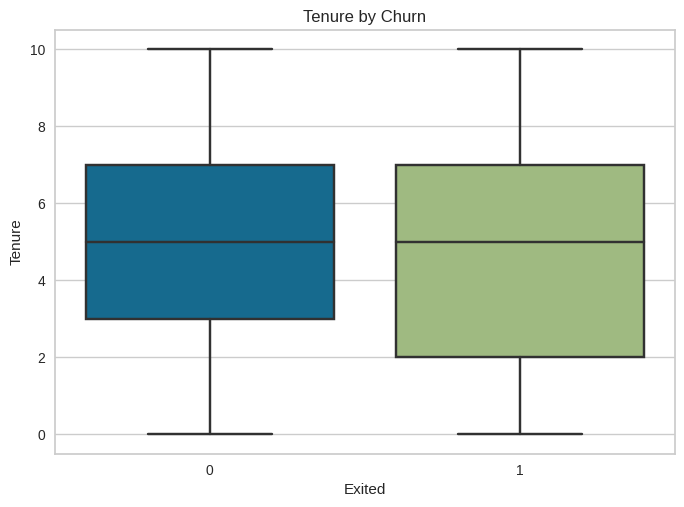

In [85]:
# plot a boxplot of tenure by churn
sns.boxplot(data=df, x='Exited', y='Tenure')
plt.title("Tenure by Churn")
plt.show()

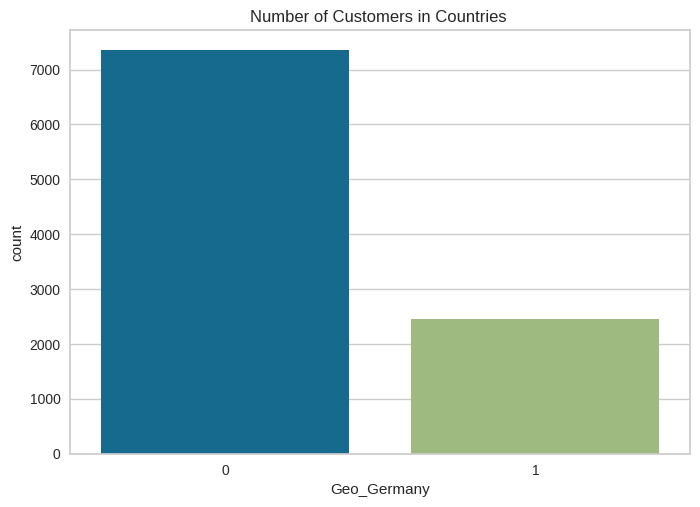

In [90]:
# plot a countplot of the number of customers in each country
sns.countplot(data=df, x='Geo_Germany')
plt.title("Number of Customers in Countries ")
plt.show()



In [92]:
# calculate the churn rate by country
churn_rate_by_country = df.groupby('Geo_Germany')['Exited'].mean() * 100

print(f"Churn rate by country:\n{churn_rate_by_country}")

churn_rate_by_country = df.groupby('Geo_Spain')['Exited'].mean() * 100

print(f"Churn rate by country:\n{churn_rate_by_country}")


Churn rate by country:
Geo_Germany
0    15.974963
1    32.000000
Name: Exited, dtype: float64
Churn rate by country:
Geo_Spain
0    21.152017
1    16.447908
Name: Exited, dtype: float64


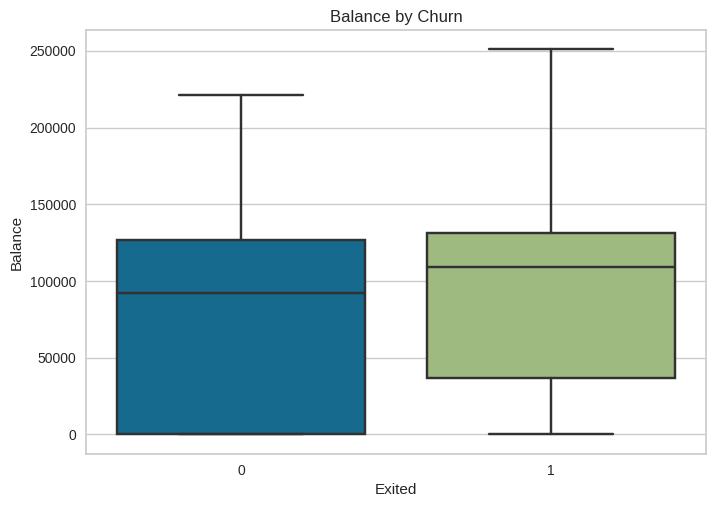

In [93]:
# plot a boxplot of balance by churn
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title("Balance by Churn")
plt.show()

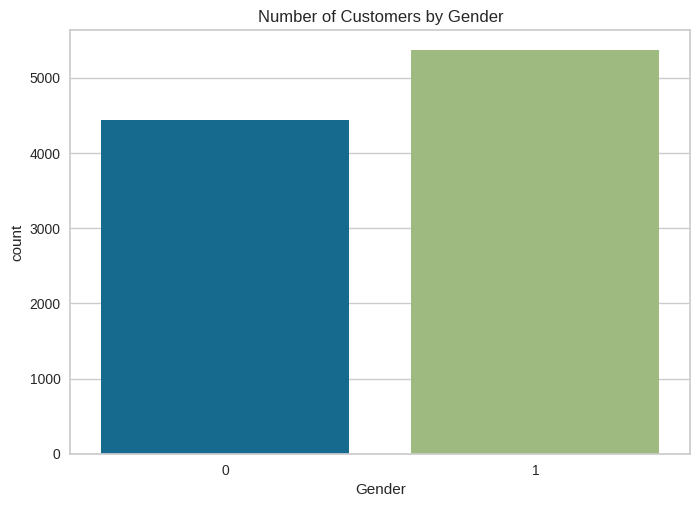

In [94]:
sns.countplot(data=df, x='Gender')
plt.title("Number of Customers by Gender")
plt.show()

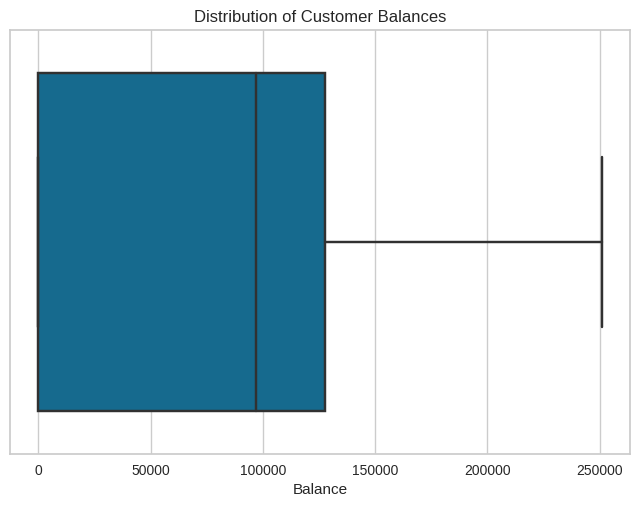

In [95]:
sns.boxplot(data=df, x='Balance')
plt.title("Distribution of Customer Balances")
plt.show()


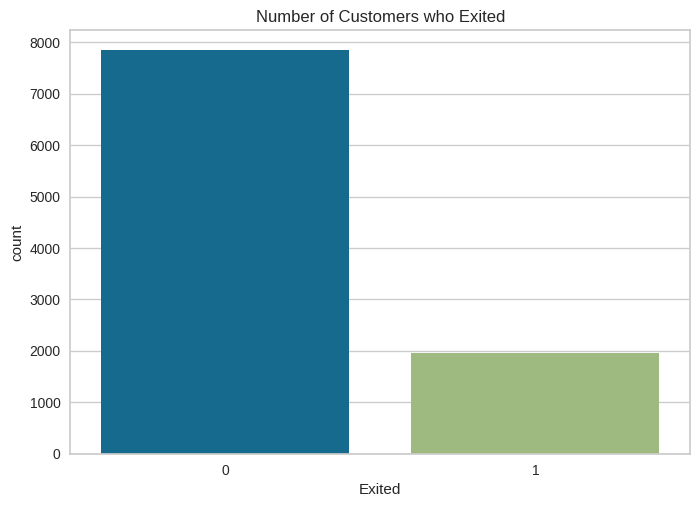

In [96]:
sns.countplot(data=df, x='Exited')
plt.title("Number of Customers who Exited")
plt.show()